#Anshuman Pati

**Heart Failure Detection**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import lime
from lime.lime_tabular import LimeTabularExplainer
import shap

In [ ]:
df=pd.read_csv("/content/heart.csv")

In [ ]:
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
489,54,M,ASY,136,220,0,Normal,140,Y,3.0,Flat,1
66,45,F,ASY,132,297,0,Normal,144,N,0.0,Up,0
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
538,54,M,ASY,130,202,1,Normal,112,Y,2.0,Flat,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1
571,69,M,ASY,140,110,1,Normal,109,Y,1.5,Flat,1
423,60,M,NAP,180,0,0,ST,140,Y,1.5,Flat,0
191,50,M,ATA,170,209,0,ST,116,N,0.0,Up,0
862,65,F,NAP,155,269,0,Normal,148,N,0.8,Up,0
565,61,M,ASY,141,292,0,ST,115,Y,1.7,Flat,1


In [ ]:
df.shape

(918, 12)

In [ ]:
# List of columns to drop
columns_to_drop = ['ExerciseAngina', 'Oldpeak', 'ST_Slope']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [ ]:
df.shape

(918, 9)

In [ ]:
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,HeartDisease
533,63,M,ASY,110,252,0,ST,140,1
81,54,M,ATA,120,238,0,Normal,154,0
324,46,M,ASY,100,0,1,ST,133,1
511,63,M,ASY,160,267,1,ST,88,1
574,69,M,ASY,142,210,1,ST,112,1
868,51,M,NAP,110,175,0,Normal,123,0
5,39,M,NAP,120,339,0,Normal,170,0
323,62,M,ASY,115,0,1,Normal,128,1
603,74,M,ASY,155,310,0,Normal,112,1
142,47,M,ASY,160,291,0,ST,158,1


In [ ]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            918 non-null    int64 
 1   Sex            918 non-null    object
 2   ChestPainType  918 non-null    object
 3   RestingBP      918 non-null    int64 
 4   Cholesterol    918 non-null    int64 
 5   FastingBS      918 non-null    int64 
 6   RestingECG     918 non-null    object
 7   MaxHR          918 non-null    int64 
 8   HeartDisease   918 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 64.7+ KB
None


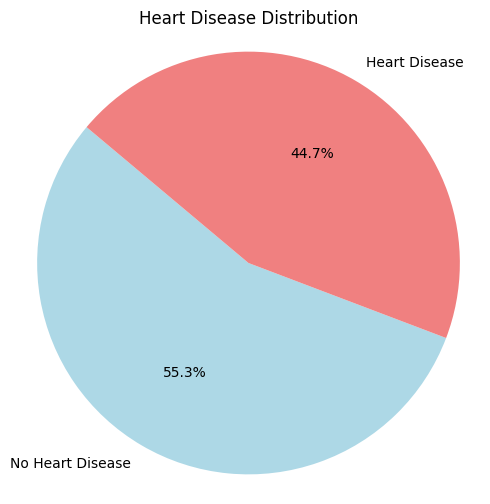

In [ ]:
# Plot a pie chart for "HeartDisease" count
heart_disease_counts = df['HeartDisease'].value_counts()
labels = ['No Heart Disease', 'Heart Disease']
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(heart_disease_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Heart Disease Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

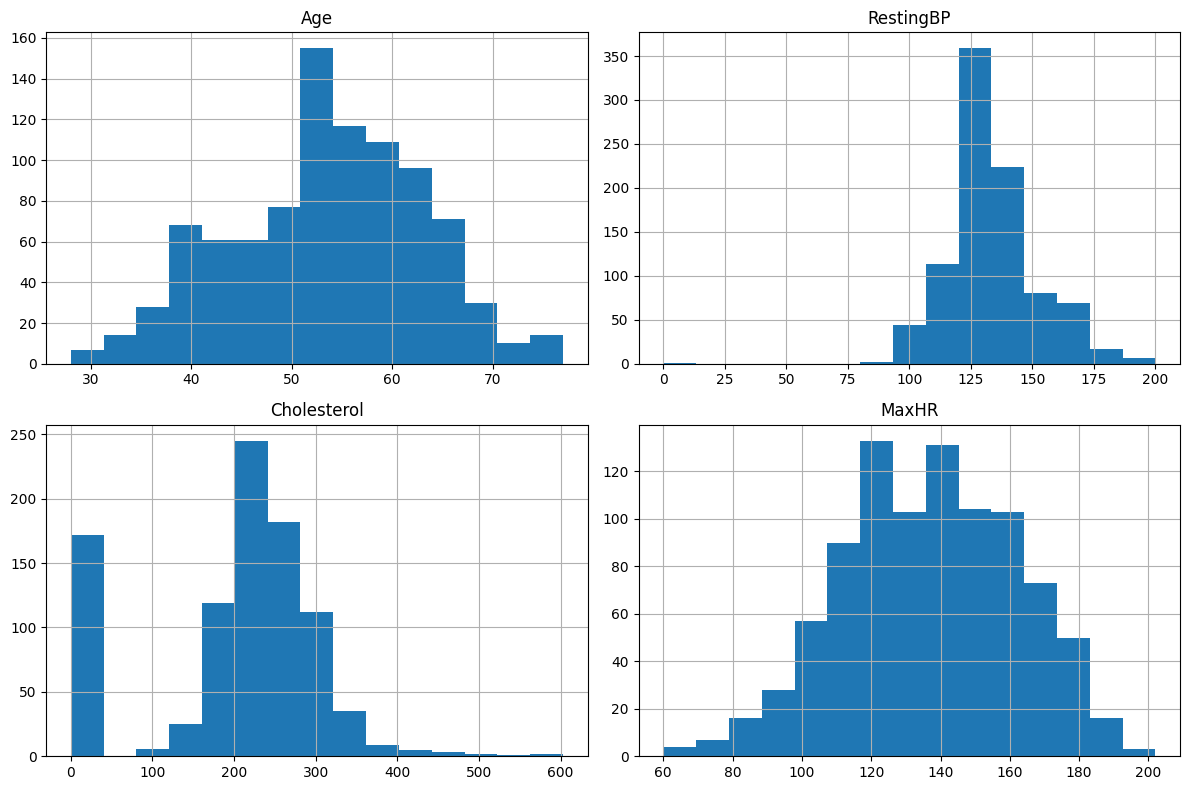

In [ ]:
# Plot histograms of numerical features
numerical_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR"]
df[numerical_cols].hist(bins=15, figsize=(12, 8))
plt.tight_layout()
plt.show()

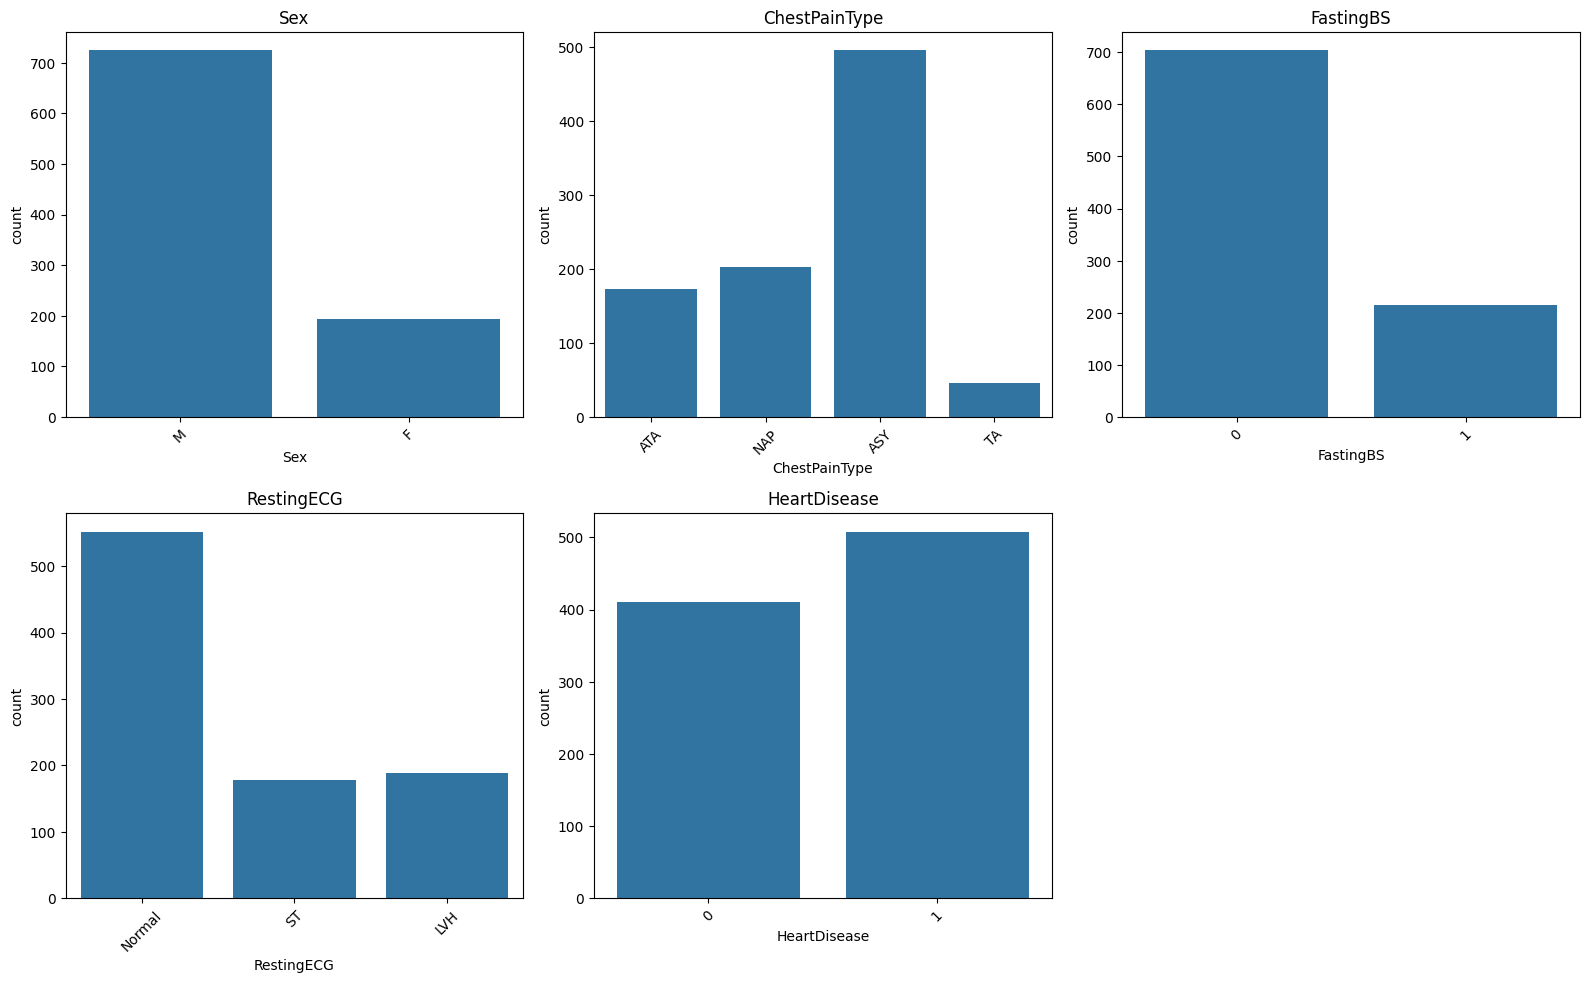

In [ ]:
# Plot count plots for categorical features
categorical_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "HeartDisease"]
plt.figure(figsize=(16, 14))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

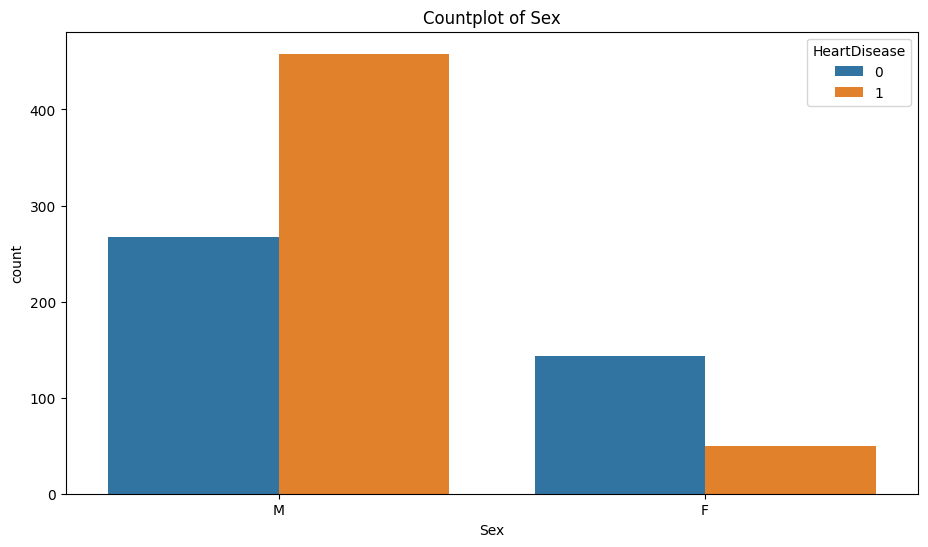

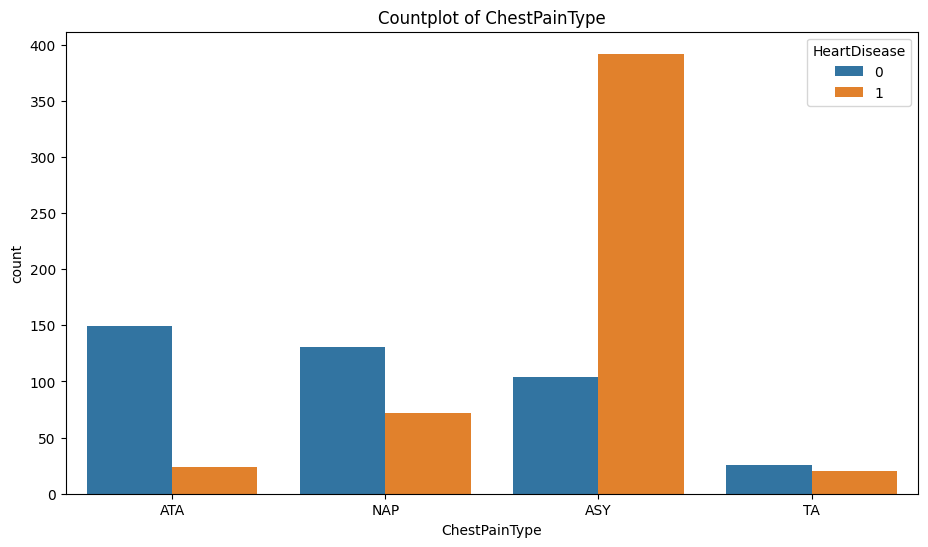

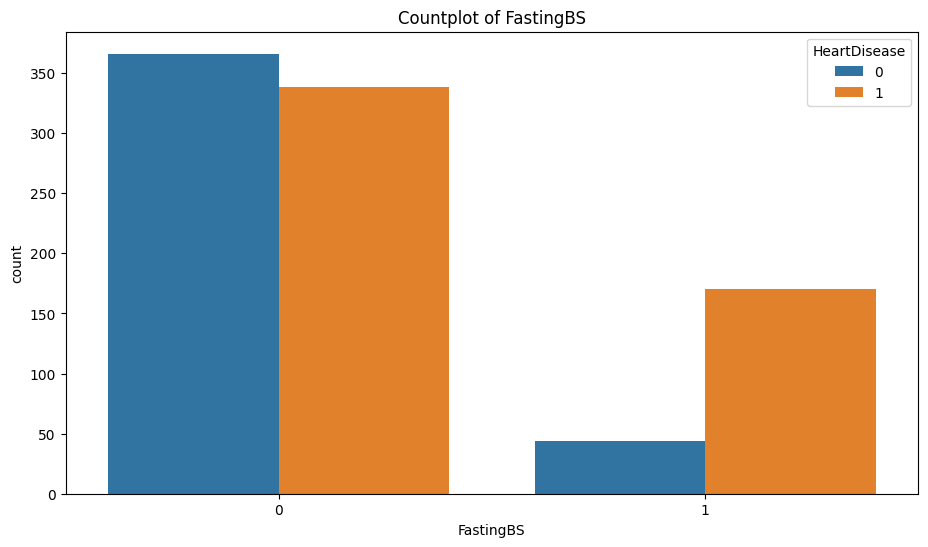

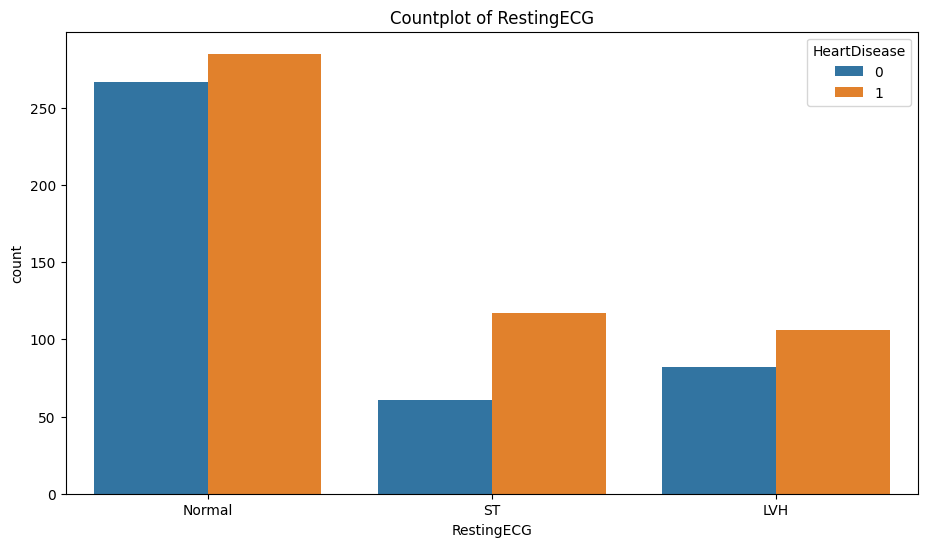

In [ ]:
# Countplot for categorical variables
categorical_vars = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG']
for var in categorical_vars:
    plt.figure(figsize=(11, 6))
    sns.countplot(x=var, hue='HeartDisease', data=df)
    plt.title(f'Countplot of {var}')
    plt.show()

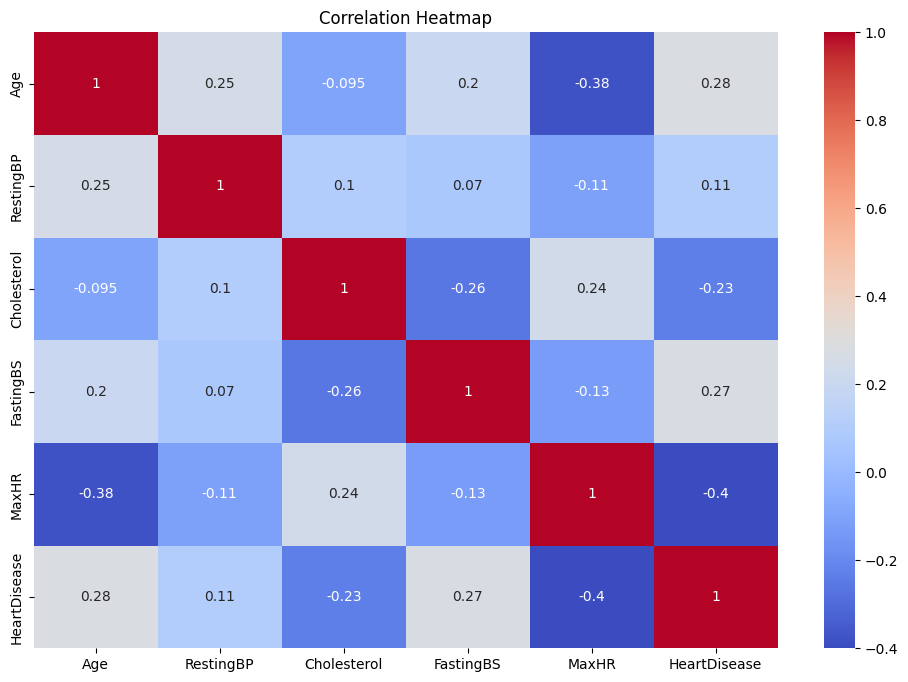

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Separate features and target
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define column transformers for one-hot encoding and normalization
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG']
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR']

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

---------------------------------------------------------------------------------------------------------------------------
CatBoost Accuracy: 0.80
CatBoost F1-score: 0.83
CatBoost Recall: 0.84


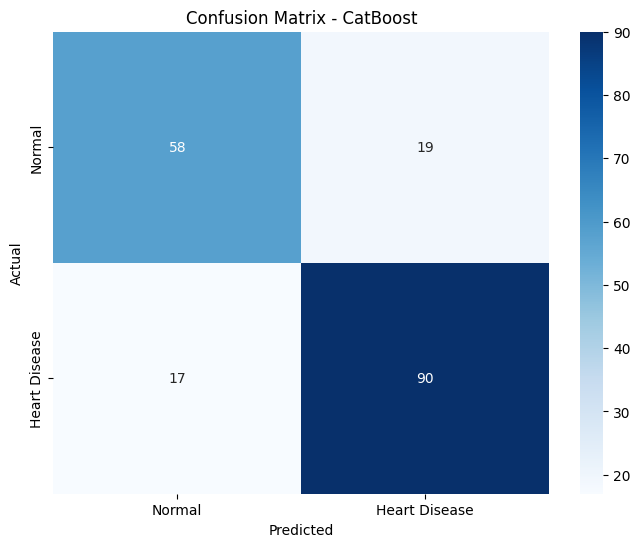

---------------------------------------------------------------------------------------------------------------------------
XGBoost Accuracy: 0.79
XGBoost F1-score: 0.81
XGBoost Recall: 0.79


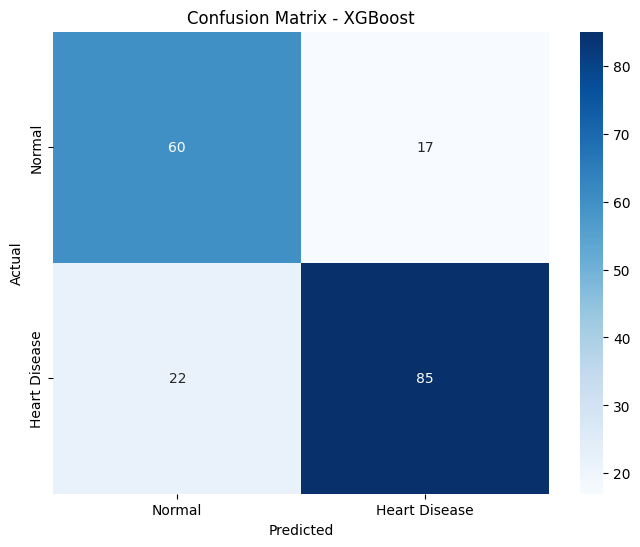

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 401, number of negative: 333
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546322 -> initscore=0.185819
[LightGBM] [Info] Start training from score 0.185819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

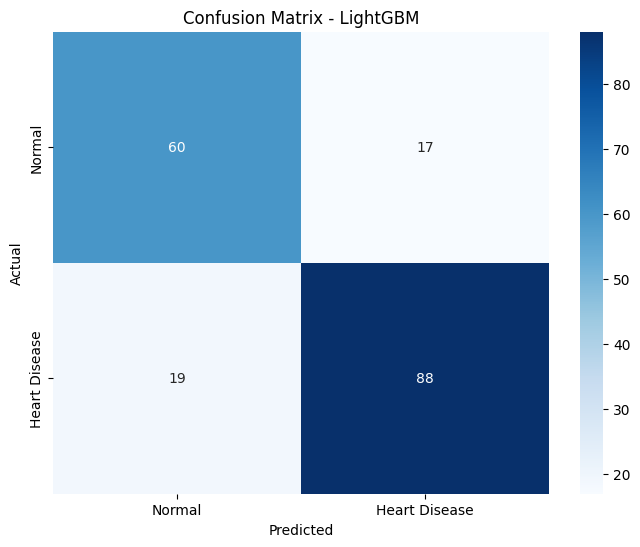

---------------------------------------------------------------------------------------------------------------------------
Random Forest Accuracy: 0.79
Random Forest F1-score: 0.82
Random Forest Recall: 0.81


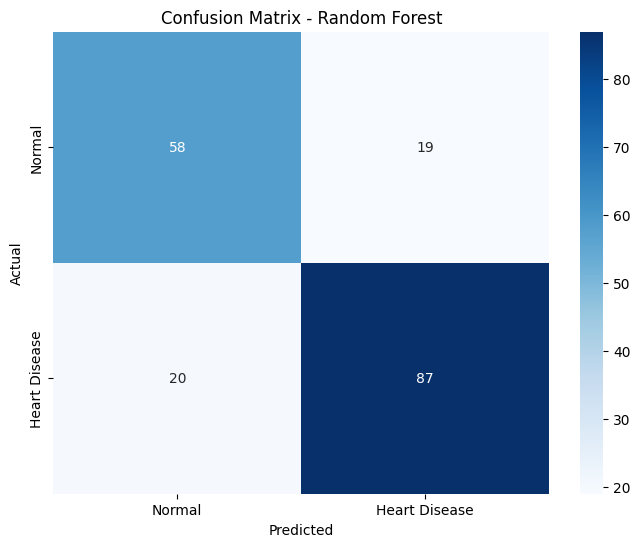

In [ ]:
# Define a list of classifiers
classifiers = [
    ('CatBoost', CatBoostClassifier(random_state=42,verbose=False)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42)),
    ('Random Forest',RandomForestClassifier(random_state=42)),
]

# Loop through classifiers
for classifier_name, classifier in classifiers:
    # Build the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', classifier)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on test set
    y_pred = pipeline.predict(X_test)

    print("---------------------------------------------------------------------------------------------------------------------------")
    # Calculate accuracy, F1-score, and recall
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"{classifier_name} Accuracy: {accuracy:.2f}")
    print(f"{classifier_name} F1-score: {f1:.2f}")
    print(f"{classifier_name} Recall: {recall:.2f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix using heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Heart Disease'], yticklabels=['Normal', 'Heart Disease'])
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Accuracy CatBoost : 0.80
F1-score CatBoost: 0.83
Recall CatBoost: 0.84


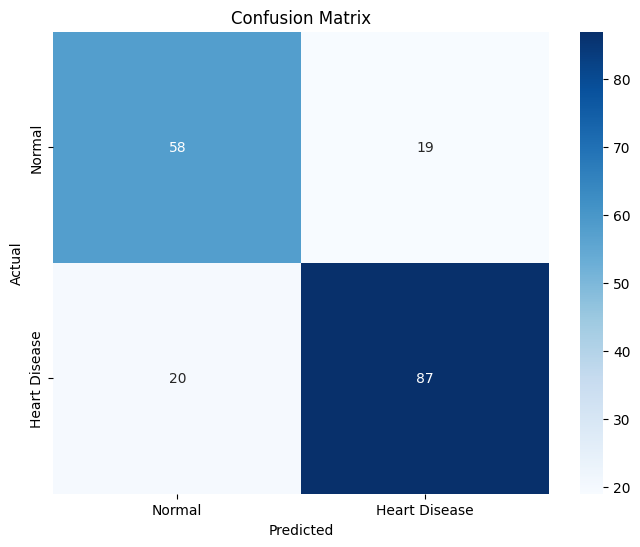

In [ ]:
# Build the pipeline with preprocessing and model
pipeline_CBC = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', CatBoostClassifier(random_state=42,verbose=False))
])
# Train the model
pipeline_CBC.fit(X_train, y_train)
# Predict on test set
y_pred_CBC = pipeline_CBC.predict(X_test)
# Calculate accuracy score
# Calculate accuracy, F1-score, and recall
accuracy_CBC = accuracy_score(y_test, y_pred_CBC)
f1_CBC = f1_score(y_test, y_pred_CBC)
recall_CBC = recall_score(y_test, y_pred_CBC)

print(f"Accuracy CatBoost : {accuracy_CBC:.2f}")
print(f"F1-score CatBoost: {f1_CBC:.2f}")
print(f"Recall CatBoost: {recall_CBC:.2f}")
# Confusion matrix
cm_CBC = confusion_matrix(y_test, y_pred_CBC)

# Plot confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Heart Disease'], yticklabels=['Normal', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Assume you have the trained CatBoost model named 'catboost_model'
# You should replace 'catboost_model' with your actual trained model

# Take input from the user
sample_input = {
    'Age': 48,
    'Sex': 'F',
    'ChestPainType': 'ASY',
    'RestingBP': 138,
    'Cholesterol': 214,
    'FastingBS': 0,
    'RestingECG': 'Normal',
    'MaxHR': 108
}

# Convert the input into a DataFrame
input_df = pd.DataFrame([sample_input])


# Predict using the trained CatBoost model
predicted_output = pipeline_CBC.predict(input_df)

# Convert the prediction to meaningful label
output_label = 'Heart Disease' if predicted_output == 1 else 'Normal'

print(f"Predicted Output: {output_label}")

Predicted Output: Heart Disease


In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,0
1,49,F,NAP,160,180,0,Normal,156,1
2,37,M,ATA,130,283,0,ST,98,0
3,48,F,ASY,138,214,0,Normal,108,1
4,54,M,NAP,150,195,0,Normal,122,0
...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,1
914,68,M,ASY,144,193,1,Normal,141,1
915,57,M,ASY,130,131,0,Normal,115,1
916,57,F,ATA,130,236,0,LVH,174,1


In [ ]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

In [ ]:
# Apply preprocessing to the entire dataset
X_preprocessed = preprocessor.fit_transform(X)

In [ ]:
# Split the preprocessed data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [ ]:
X_train

array([[ 0.        ,  1.        ,  0.        , ..., -0.66993455,
         0.37686353,  2.24748845],
       [ 0.        ,  1.        ,  0.        , ..., -0.12951283,
         0.09330416,  1.61871737],
       [ 0.        ,  1.        ,  1.        , ...,  0.95133062,
         0.12989247, -0.46408682],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -0.12951283,
         0.49577552,  0.28257883],
       [ 0.        ,  1.        ,  1.        , ...,  1.05941496,
        -1.81843477, -0.73917417],
       [ 1.        ,  0.        ,  1.        , ...,  0.95133062,
         1.76721911, -0.26759586]])

In [ ]:
# Build the pipeline with model
pipeline = Pipeline(steps=[
    ('model', CatBoostClassifier(random_state=42,verbose=False))
])

accuracy: 0.8043478260869565
f1: 0.8333333333333334
recall: 0.8411214953271028


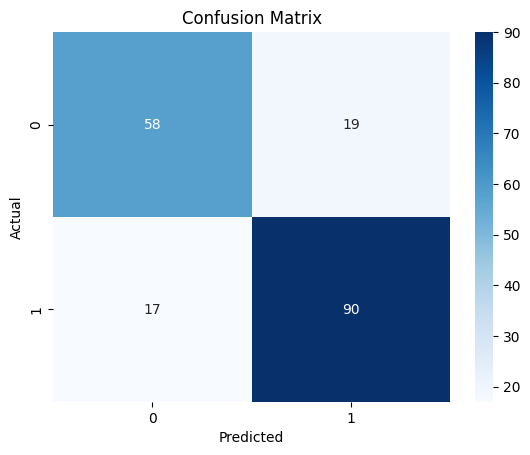

In [ ]:
# Train the model
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy, F1-score, and recall
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy:",accuracy)
print("f1:",f1)
print("recall:",recall)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Choose a specific instance for explanation
instance_to_explain = X_test[0]
instance_to_explain

array([ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.00653719,
        0.41090889, -0.0347549 ,  1.65801556])

In [ ]:
# Create a LIME explainer
explainer = LimeTabularExplainer(X_train, training_labels=y_train, mode="classification")

In [ ]:
# Explain the model's prediction for the chosen instance
explanation = explainer.explain_instance(instance_to_explain, pipeline.predict_proba)

In [ ]:
# Display the explanation
explanation.show_in_notebook()

In [ ]:
# Display the explanation with mapped column names
for feature, value in explanation.as_list():
    feature_name = feature.split()[0]
    print(f"{feature_name}: {value}")

2: -0.2823930060474982
3: -0.166896025385788
12: -0.15686986911852877
-0.20: -0.1096871232780985
9: 0.10601943843490705
0: -0.08727016023056013
6: -0.041466493879016915
-0.13: 0.023847104203022274
4: 0.019525687578455592
5: -0.015890649030174696


In [ ]:
# Train the model
pipeline.fit(X_train, y_train)

# Initialize the SHAP explainer
explainer = shap.Explainer(pipeline.named_steps['model'], X_train)

# Choose a specific instance for explanation
instance_to_explain = X_test[0]

# Explain the model's prediction for the chosen instance
shap_values = explainer(X_test)

# Visualize the SHAP values
shap.initjs()
shap.plots.force(shap_values[0])

 97%|=================== | 179/184 [00:16<00:00]       